# SQLite and sqlite3 in Python

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# -*- coding: utf-8 -*-
from __future__ import unicode_literals

Connecting to a Database: Establish a connection to an existing database or create a new one
This creates a database file named your_database.db in the current directory. If the file already exists, it will connect to that database.

In [2]:
conn = sqlite3.connect('Emre Ozgen - SQLDersleri.db')

Creating a Cursor: The cursor allows you to execute SQL commands:

In [3]:
cur = conn.cursor()

Closing the Connection: After completing your operations, always close the connection

In [4]:
# conn.close()

To retrieve unique values from a column, use the SELECT DISTINCT statemen

In [5]:
# cur.execute("SELECT DISTINCT column_name FROM table_name;")
# rows = cur.fetchall()  # Fetches all rows from the executed query.
# for row in rows:
#    print(row)

For example, if you have a theaters table and want to get unique theater categories:

Kodun Amacı:
Bu Python kodu, bir veritabanındaki "DepremSenaryosu" adlı tablodaki tüm farklı "ilce_adi" (ilçe adı) değerlerini çekmek ve ekrana yazdırmak için kullanılıyor. Yani, bu tabloda hangi ilçelerin olduğunu ve her bir ilçenin sadece bir kez listelenmesini sağlıyor.

In [6]:
# Aşağıdaki satır, bir veritabanı bağlantısına (cursor nesnesi) bir SQL sorgusu gönderir.
# SELECT DISTINCT ilce_adi: 
# Tablodaki "ilce_adi" sütunundaki tüm farklı (unique) değerleri seçer.
# "DISTINCT" anahtar kelimesi sayesinde aynı ilçenin adı birden fazla kez listelenmez.
# FROM DepremSenaryosu: Veri sorgusunun uygulanacağı tablo adı belirtilir.
cur.execute("SELECT DISTINCT ilce_adi FROM DepremSenaryosu;")

# cur.fetchall(): Veritabanından alınan tüm sonuçları bir liste halinde "categories" adlı değişkene atar.
# Her bir liste elemanı, bir tuple şeklindedir 
# ve içinde sadece bir eleman (ilçe adı) bulunur.
categories = cur.fetchall()

# "categories" listesindeki her bir eleman (ilçe adı) için bir döngü başlatır.
# her bir iterasyonda, döngünün içindeki "category" değişkenine atanan ilçe adı yazdırılır.
for category in categories:
    print(category)




('ADALAR',)
('ARNAVUTKÖY',)
('ATAŞEHÝR',)
('AVCILAR',)
('BAÐCILAR',)
('BAHÇELÝEVLER',)
('BAKIRKÖY',)
('BAŞAKŞEHÝR',)
('BAYRAMPAŞA',)
('BEŞÝKTAŞ',)
('BEYKOZ',)
('BEYLÝKDÜZÜ',)
('BEYOÐLU',)
('BÜYÜKÇEKMECE',)
('ÇATALCA',)
('ÇEKMEKÖY',)
('ESENLER',)
('ESENYURT',)
('EYÜP',)
('FATÝH',)
('GAZÝOSMANPAŞA',)
('GÜNGÖREN',)
('KADIKÖY',)
('KAÐITHANE',)
('KARTAL',)
('KÜÇÜKÇEKMECE',)
('MALTEPE',)
('PENDÝK',)
('SANCAKTEPE',)
('SARIYER',)
('SÝLÝVRÝ',)
('SULTANBEYLÝ',)
('SULTANGAZÝ',)
('ŞÝLE',)
('ŞÝŞLÝ',)
('TUZLA',)
('ÜMRANÝYE',)
('ÜSKÜDAR',)
('ZEYTÝNBURNU',)


You can directly run SQL queries and read the result into a pandas DataFrame

In [7]:
# df = pd.read_sql_query("SELECT * FROM table_name;", conn)

# For example, to get the sum of viewers grouped by Oyun_Tipi (theater type):

# query = "SELECT Oyun_Tipi, SUM(İzleyici_Sayısı) AS Total_İzleyici FROM tiyatrolar GROUP BY Oyun_Tipi;"
# df = pd.read_sql_query(query, conn)

To Read the Results Into Pandas DataFrame

Bu kod, table_name tablosundaki tüm verileri alır ve df adında bir Pandas DataFrame'ine yükler. DataFrame'ler, verileri tablo şeklinde tutan ve üzerinde çeşitli analizler yapmanıza olanak tanıyan yapılar.

pd.read_sql_query(): Bu fonksiyon, Pandas kütüphanesinden bir SQL sorgusunu çalıştırıp sonucu bir DataFrame'e dönüştürmek için kullanılır.
"SELECT * FROM table_name;": Bu SQL sorgusu, belirtilen table_name tablosundaki tüm sütunları ve tüm satırları seçer. * tüm sütunları temsil eder.
conn: Bu ise veritabanına olan bağlantınızı temsil eder. Öncelikle bir veritabanı bağlantısı oluşturmanız gerekir (örneğin, MySQL, PostgreSQL, SQLite).

query: Burada daha spesifik bir SQL sorgusu yazıyoruz.
SELECT Oyun_Tipi, SUM(İzleyici_Sayısı) AS Total_İzleyici: Oyun_Tipi sütununu ve her bir oyun tipine ait toplam izleyici sayısını (SUM(İzleyici_Sayısı)) seçiyoruz.
FROM tiyatrolar: tiyatrolar adlı tablodan veri çekiyoruz.
GROUP BY Oyun_Tipi: Sonuçları Oyun_Tipi sütununa göre gruplandırıyoruz, yani her bir oyun tipi için toplam izleyici sayısını ayrı ayrı hesaplayacağız.
AS Total_İzleyici: SUM(İzleyici_Sayısı) sonucunu Total_İzleyici adında yeni bir sütun olarak tanımlıyoruz.

In [8]:
df = pd.read_sql_query("SELECT * FROM DepremSenaryosu;", conn)

query = "SELECT ilce_adi, SUM(can_kaybi_sayisi) AS toplam_can_kaybi FROM DepremSenaryosu GROUP BY ilce_adi;"
df = pd.read_sql_query(query, conn)
print (df)

         ilce_adi  toplam_can_kaybi
0          ADALAR                76
1      ARNAVUTKÖY                 0
2        ATAŞEHÝR                89
3         AVCILAR               465
4    BAHÇELÝEVLER              1633
5        BAKIRKÖY              1046
6      BAYRAMPAŞA               520
7        BAÐCILAR              1179
8      BAŞAKŞEHÝR                71
9          BEYKOZ                25
10     BEYLÝKDÜZÜ               527
11        BEYOÐLU               217
12       BEŞÝKTAŞ                26
13   BÜYÜKÇEKMECE               288
14        ESENLER               638
15       ESENYURT              1003
16           EYÜP               168
17          FATÝH              1484
18  GAZÝOSMANPAŞA               140
19       GÜNGÖREN               754
20        KADIKÖY               190
21         KARTAL               176
22      KAÐITHANE                84
23   KÜÇÜKÇEKMECE              1515
24        MALTEPE               234
25         PENDÝK               195
26     SANCAKTEPE           

Pandas DataFrame'lerindeki verileri görselleştirmek

df.plot(kind='bar', x='Oyun_Tipi', y='Total_İzleyici', legend=False):

df.plot(): DataFrame'e ait bir plot oluşturmak için kullanılır.

kind='bar': Çubuk grafiği oluşturmak için belirtilir.

x='Oyun_Tipi': x ekseninde kullanılacak sütun belirtilir (oyun tipleri).

y='Total_İzleyici': y ekseninde kullanılacak sütun belirtilir (toplam izleyici sayıları).

legend=False: Grafiğin efsanesini gizler.

plt.ylabel('Toplam İzleyici'): y eksenine etiket verir.

plt.title('Yerli ve Yabancı Oyunlar'): Grafiğe başlık verir.

plt.show(): Oluşturulan grafiği ekranda gösterir.

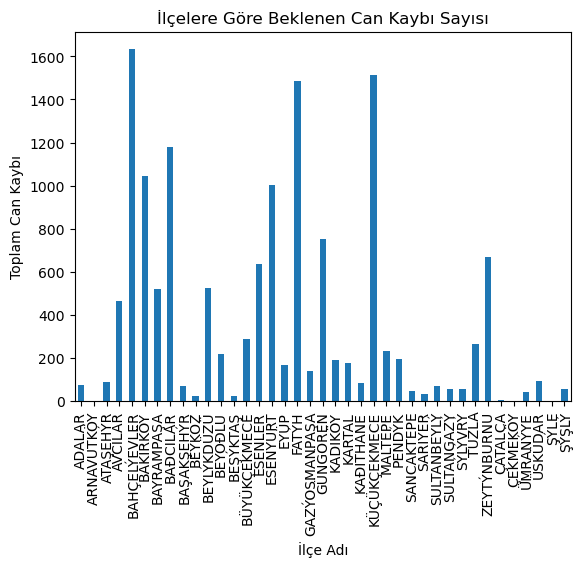

In [9]:
df.plot(kind='bar',x='ilce_adi',y='toplam_can_kaybi',legend=False)
plt.ylabel('Toplam Can Kaybı')
plt.xlabel('İlçe Adı')
plt.title('İlçelere Göre Beklenen Can Kaybı Sayısı')
plt.show()


In [10]:
query_toplam_cok_agir_hasarli = "SELECT ilce_adi, SUM(cok_agir_hasarli_bina_sayisi) AS toplam_cok_agir_hasarli_bina FROM DepremSenaryosu GROUP BY ilce_adi ORDER BY toplam_cok_agir_hasarli_bina;"
df_toplam_cok_agir_hasarli = pd.read_sql_query(query_toplam_cok_agir_hasarli, conn)
print (df_toplam_cok_agir_hasarli)

         ilce_adi  toplam_cok_agir_hasarli_bina
0        ÇEKMEKÖY                            16
1            ŞÝLE                            22
2      ARNAVUTKÖY                            41
3      SULTANGAZÝ                            61
4         ÇATALCA                            63
5        BEŞÝKTAŞ                            64
6           ŞÝŞLÝ                            68
7      SANCAKTEPE                            84
8       KAÐITHANE                            94
9         SARIYER                           102
10       ÜMRANÝYE                           105
11    SULTANBEYLÝ                           109
12         BEYKOZ                           113
13     BAŞAKŞEHÝR                           115
14       ATAŞEHÝR                           123
15  GAZÝOSMANPAŞA                           129
16        ÜSKÜDAR                           146
17         KARTAL                           199
18        KADIKÖY                           208
19        AVCILAR                       

<Axes: xlabel='ilce_adi'>

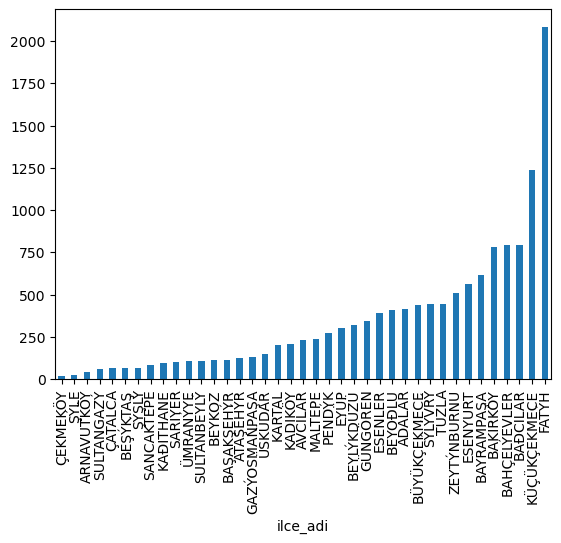

In [11]:
df_toplam_cok_agir_hasarli.plot(kind='bar',x='ilce_adi',y='toplam_cok_agir_hasarli_bina',legend=False)

In [12]:
query_toplam_hasarli = "SELECT ilce_adi, SUM(cok_agir_hasarli_bina_sayisi + agir_hasarli_bina_sayisi + orta_hasarli_bina_sayisi + hafif_hasarli_bina_sayisi) AS toplam_hasarli_bina_sayisi FROM DepremSenaryosu GROUP BY ilce_adi ORDER BY toplam_hasarli_bina_sayisi;"
df_toplam_hasarli = pd.read_sql_query(query_toplam_hasarli, conn)
print (df_toplam_hasarli)

         ilce_adi  toplam_hasarli_bina_sayisi
0            ŞÝLE                        3304
1        ÇEKMEKÖY                        4519
2        BEŞÝKTAŞ                        4545
3          ADALAR                        4892
4           ŞÝŞLÝ                        5616
5         ÇATALCA                        6073
6      ARNAVUTKÖY                        6938
7       KAÐITHANE                        7912
8        GÜNGÖREN                        7957
9      BEYLÝKDÜZÜ                        8606
10     SULTANGAZÝ                        8994
11       BAKIRKÖY                        9421
12     SANCAKTEPE                        9772
13  GAZÝOSMANPAŞA                        9777
14        KADIKÖY                        9856
15     BAŞAKŞEHÝR                        9910
16        SARIYER                        9930
17       ATAŞEHÝR                       10183
18         BEYKOZ                       10668
19        BEYOÐLU                       11541
20    ZEYTÝNBURNU                 

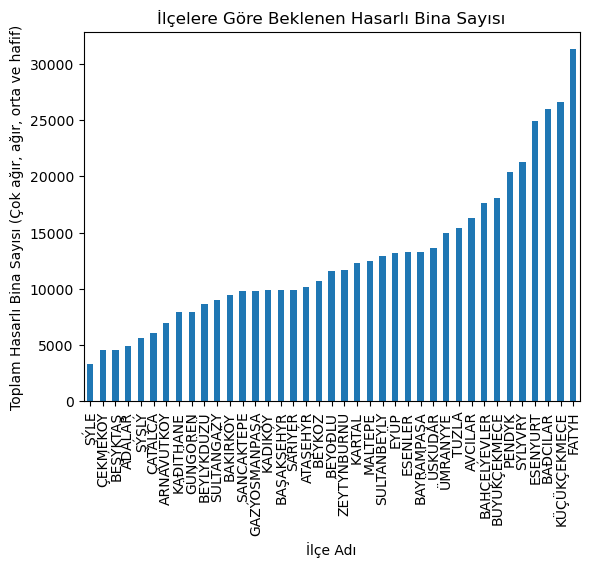

In [13]:
df_toplam_hasarli.plot(kind='bar',x='ilce_adi',y='toplam_hasarli_bina_sayisi',legend=False)
plt.ylabel('Toplam Hasarlı Bina Sayısı (Çok ağır, ağır, orta ve hafif)')
plt.xlabel('İlçe Adı')
plt.title('İlçelere Göre Beklenen Hasarlı Bina Sayısı')
plt.show()